In [1]:
import pandas as pd

In [2]:
# Load the dataset into a DataFrame
# 1.   Age		Age of the patient
# 2.   Gender		Gender of the patient
# 3.   TB			Total Bilirubin
# 4.   DB		 	Direct Bilirubin
# 5.   Alkphos 		Alkaline Phosphotase
# 6.   Sgpt 		Alamine Aminotransferase
# 7.   Sgot 		Aspartate Aminotransferase
# 8.   TP			Total Protiens
# 9.   ALB		Albumin
# 10. A/G Ratio	
# df = pd.read_csv('dataset/Indian Liver Patient Dataset (ILPD).csv',
#                  names=['Age','Gender','TB','DB','Alkphos','sgpt','sgot','TP','ALB','A/G Ratio','label'])
df=pd.read_csv('dataset/BankChurners.csv')

In [3]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
new_column_names = {
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'mon_2',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'mon_1',
}

In [5]:
df.rename(columns=new_column_names, inplace=True)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,mon_1,mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
df.drop(columns=['CLIENTNUM','mon_1','mon_2'],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [8]:

df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
# Display count of survivors (0: Not Survived, 1: Survived)
label_counts = df['Attrition_Flag'].value_counts()
print(label_counts)

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


In [12]:
type(label_counts)

pandas.core.series.Series

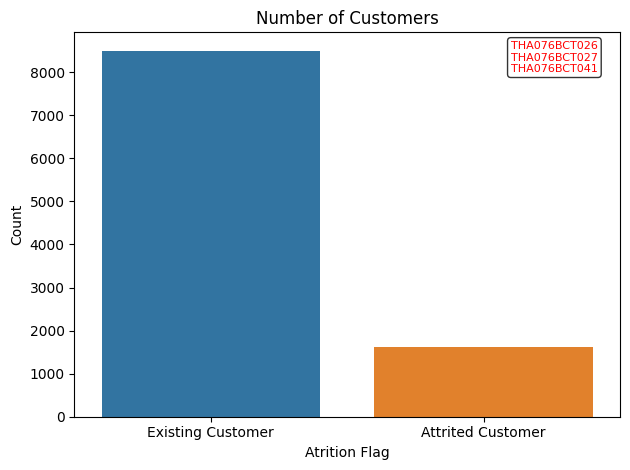

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the count plot
sns.countplot(x='Attrition_Flag', data=df)

text_box = {
    'boxstyle': 'round',
    'facecolor': 'white',
    'alpha': 0.8
}

plt.text(1.1, 8000, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
# Set plot labels
plt.xlabel('Atrition Flag')
plt.ylabel('Count')
plt.title('Number of Customers')
plt.tight_layout()
plt.savefig('Number of Label.png',bbox_inches='tight')
# Show the plot
plt.show()

In [14]:
df.replace({'Attrition_Flag':{'Existing Customer':0,'Attrited Customer':1}},inplace=True)
# Group the data by 'Sex' and calculate the mean of 'Attrition_Flag' for each group
Atrition_rate_by_gender = df.groupby('Gender')['Attrition_Flag'].mean()

# Print the Atrition rates
print(Atrition_rate_by_gender)

Gender
F    0.173572
M    0.146152
Name: Attrition_Flag, dtype: float64


In [15]:
# Create a pivot table to calculate the mean of 'Attrition_Flag' for each combination of 'Sex' and 'Card_Category'
Attrition_rate_pivot = df.pivot_table(values='Attrition_Flag', index='Gender', columns='Card_Category', aggfunc='mean')

# Print the survival rates
print(Attrition_rate_pivot)

Card_Category      Blue      Gold  Platinum    Silver
Gender                                               
F              0.174476  0.210526  0.444444  0.133333
M              0.145098  0.166667  0.090909  0.156522


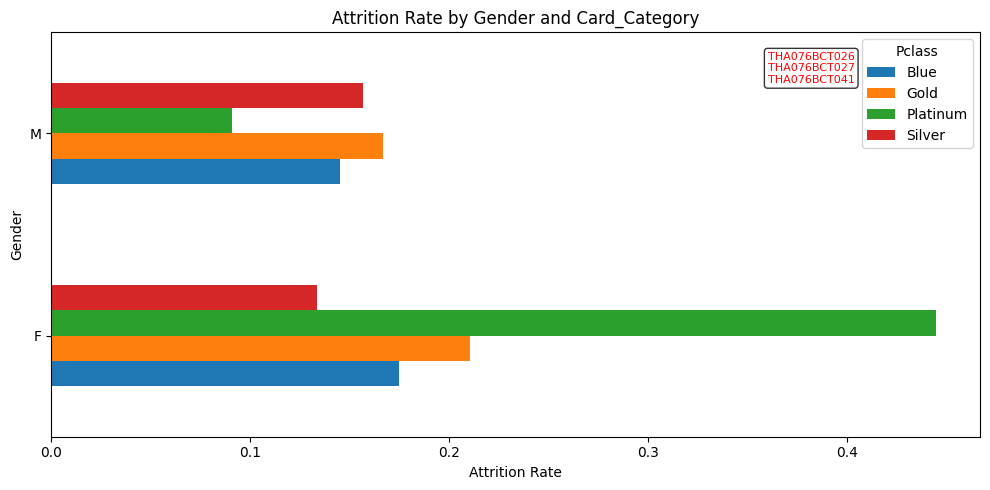

In [16]:
# Plot the survival rates using bar function
Attrition_rate_pivot.plot(kind='barh', figsize=(10, 5))
plt.xlabel('Attrition Rate')
plt.ylabel('Gender')
plt.title('Attrition Rate by Gender and Card_Category')
plt.legend(title='Pclass')
plt.text(0.36, 1.25, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
plt.tight_layout()
plt.savefig('Attrition Rate by Gender and Card_Category.png',bbox_inches='tight')
plt.show()

In [17]:
# Discretize the 'Age' column into age groups using the cut function
age_bins = [0, 18, 30, 50, 100]
age_labels = ['0-17', '18-29', '30-49', '50+']
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=age_bins, labels=age_labels)

In [18]:
df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,30-49
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,30-49
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,50+
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,30-49
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,30-49


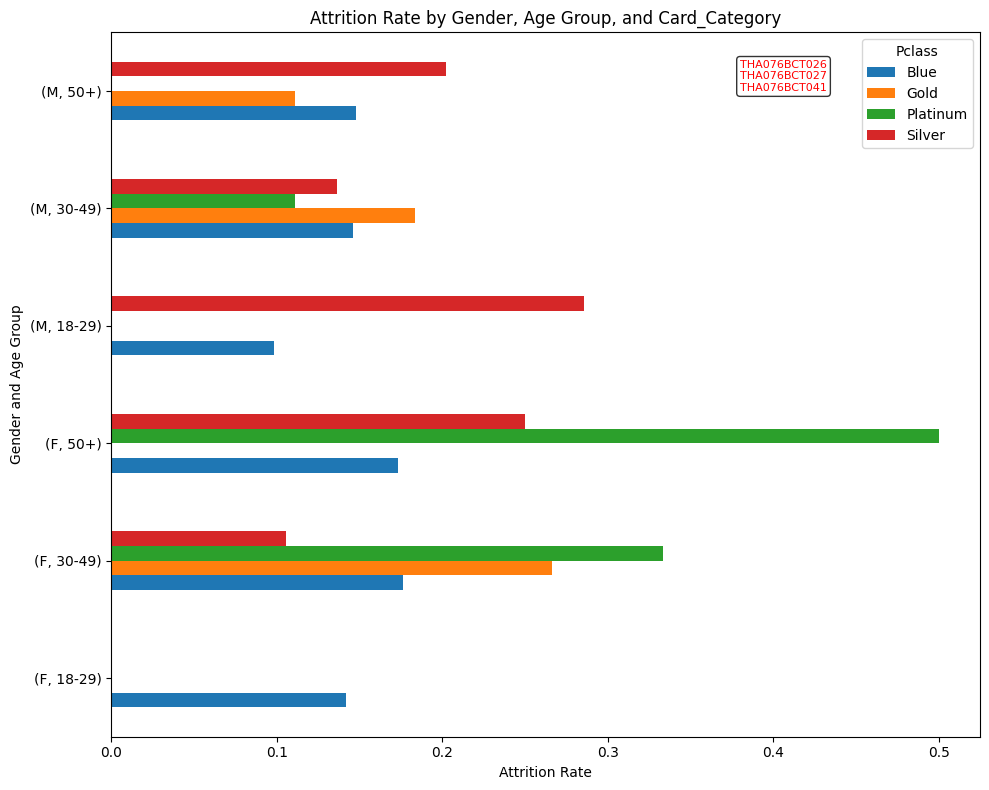

In [19]:
# Create a pivot table to calculate the mean of 'Attrition_Flag' for each combination of 'Sex', 'Age_Group', and 'Card_Category'
Attrition_rate_pivot = df.pivot_table(values='Attrition_Flag', index=['Gender', 'Age_Group'], columns='Card_Category', aggfunc='mean')

# Plot the Attrition rates using barh function
Attrition_rate_pivot.plot(kind='barh', figsize=(10, 8))
plt.xlabel('Attrition Rate')
plt.ylabel('Gender and Age Group')
plt.title('Attrition Rate by Gender, Age Group, and Card_Category')
plt.legend(title='Pclass', loc='upper right')
plt.text(0.38, 5, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
plt.tight_layout()
plt.savefig('Attrition Rate by Gender, Age Group, and Card_Category.png',bbox_inches='tight')
plt.show()

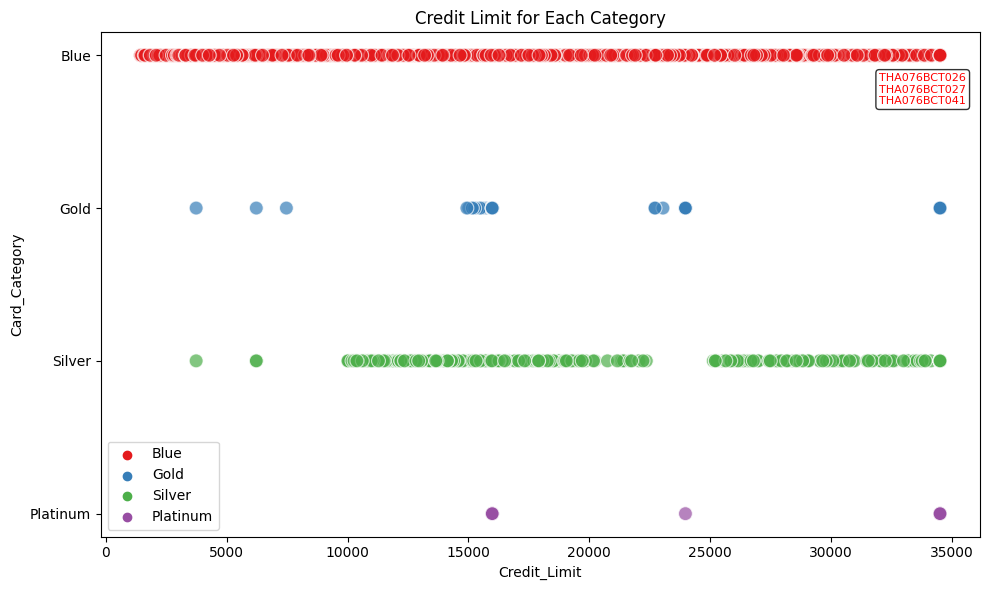

In [20]:
# Create a scatter plot for each passenger class
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Credit_Limit', y='Card_Category', hue='Card_Category', palette='Set1', s=100, alpha=0.7)

plt.title('Credit Limit for Each Category')
plt.legend()
plt.text(32000, 0.32, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
plt.tight_layout()
plt.savefig('Credit Limit for Each Category.png',bbox_inches='tight')

# Show the plot
plt.show()

In [21]:
# Create a new DataFrame without the 'Class' variable
df1 = df.drop('Card_Category', axis=1)
df1.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group
0,0,45,M,3,High School,Married,$60K - $80K,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,30-49
1,0,49,F,5,Graduate,Single,Less than $40K,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,30-49
2,0,51,M,3,Graduate,Married,$80K - $120K,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,50+
3,0,40,F,4,High School,Unknown,Less than $40K,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,30-49
4,0,40,M,3,Uneducated,Married,$60K - $80K,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,30-49


In [22]:
numeric_df = df1.replace({'M': 1, 'F': 0})

In [23]:
numeric_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group
0,0,45,1,3,High School,Married,$60K - $80K,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,30-49
1,0,49,0,5,Graduate,Single,Less than $40K,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,30-49
2,0,51,1,3,Graduate,Married,$80K - $120K,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,50+
3,0,40,0,4,High School,Unknown,Less than $40K,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,30-49
4,0,40,1,3,Uneducated,Married,$60K - $80K,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,30-49


In [24]:
numeric_df.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,0.470919,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,0.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,1.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


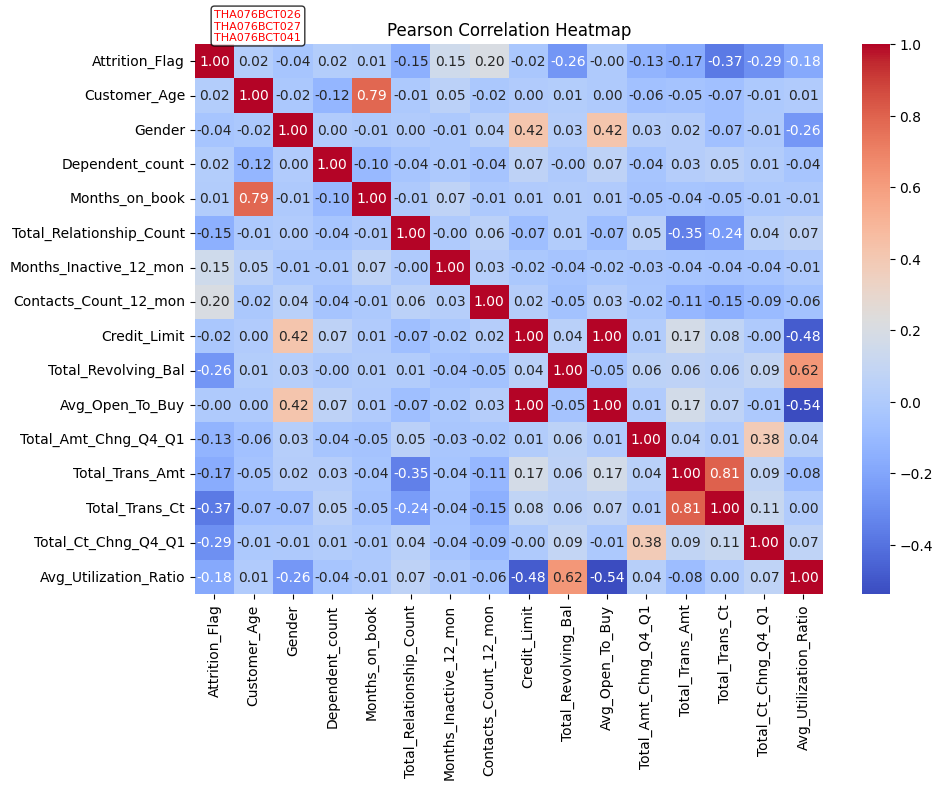

In [25]:
new_df=numeric_df.drop(columns=['Marital_Status','Education_Level','Income_Category','Age_Group'])
# Assuming 'df' is the DataFrame containing the data
correlation_matrix = new_df.corr(method='pearson')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.text(.5, -0.1, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
plt.tight_layout()
plt.savefig('Pearson Correlation Heatmap.png',bbox_inches='tight')
plt.show()

In [26]:
# Get the list of column names
column_names = new_df.columns.tolist()
print(column_names)

['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


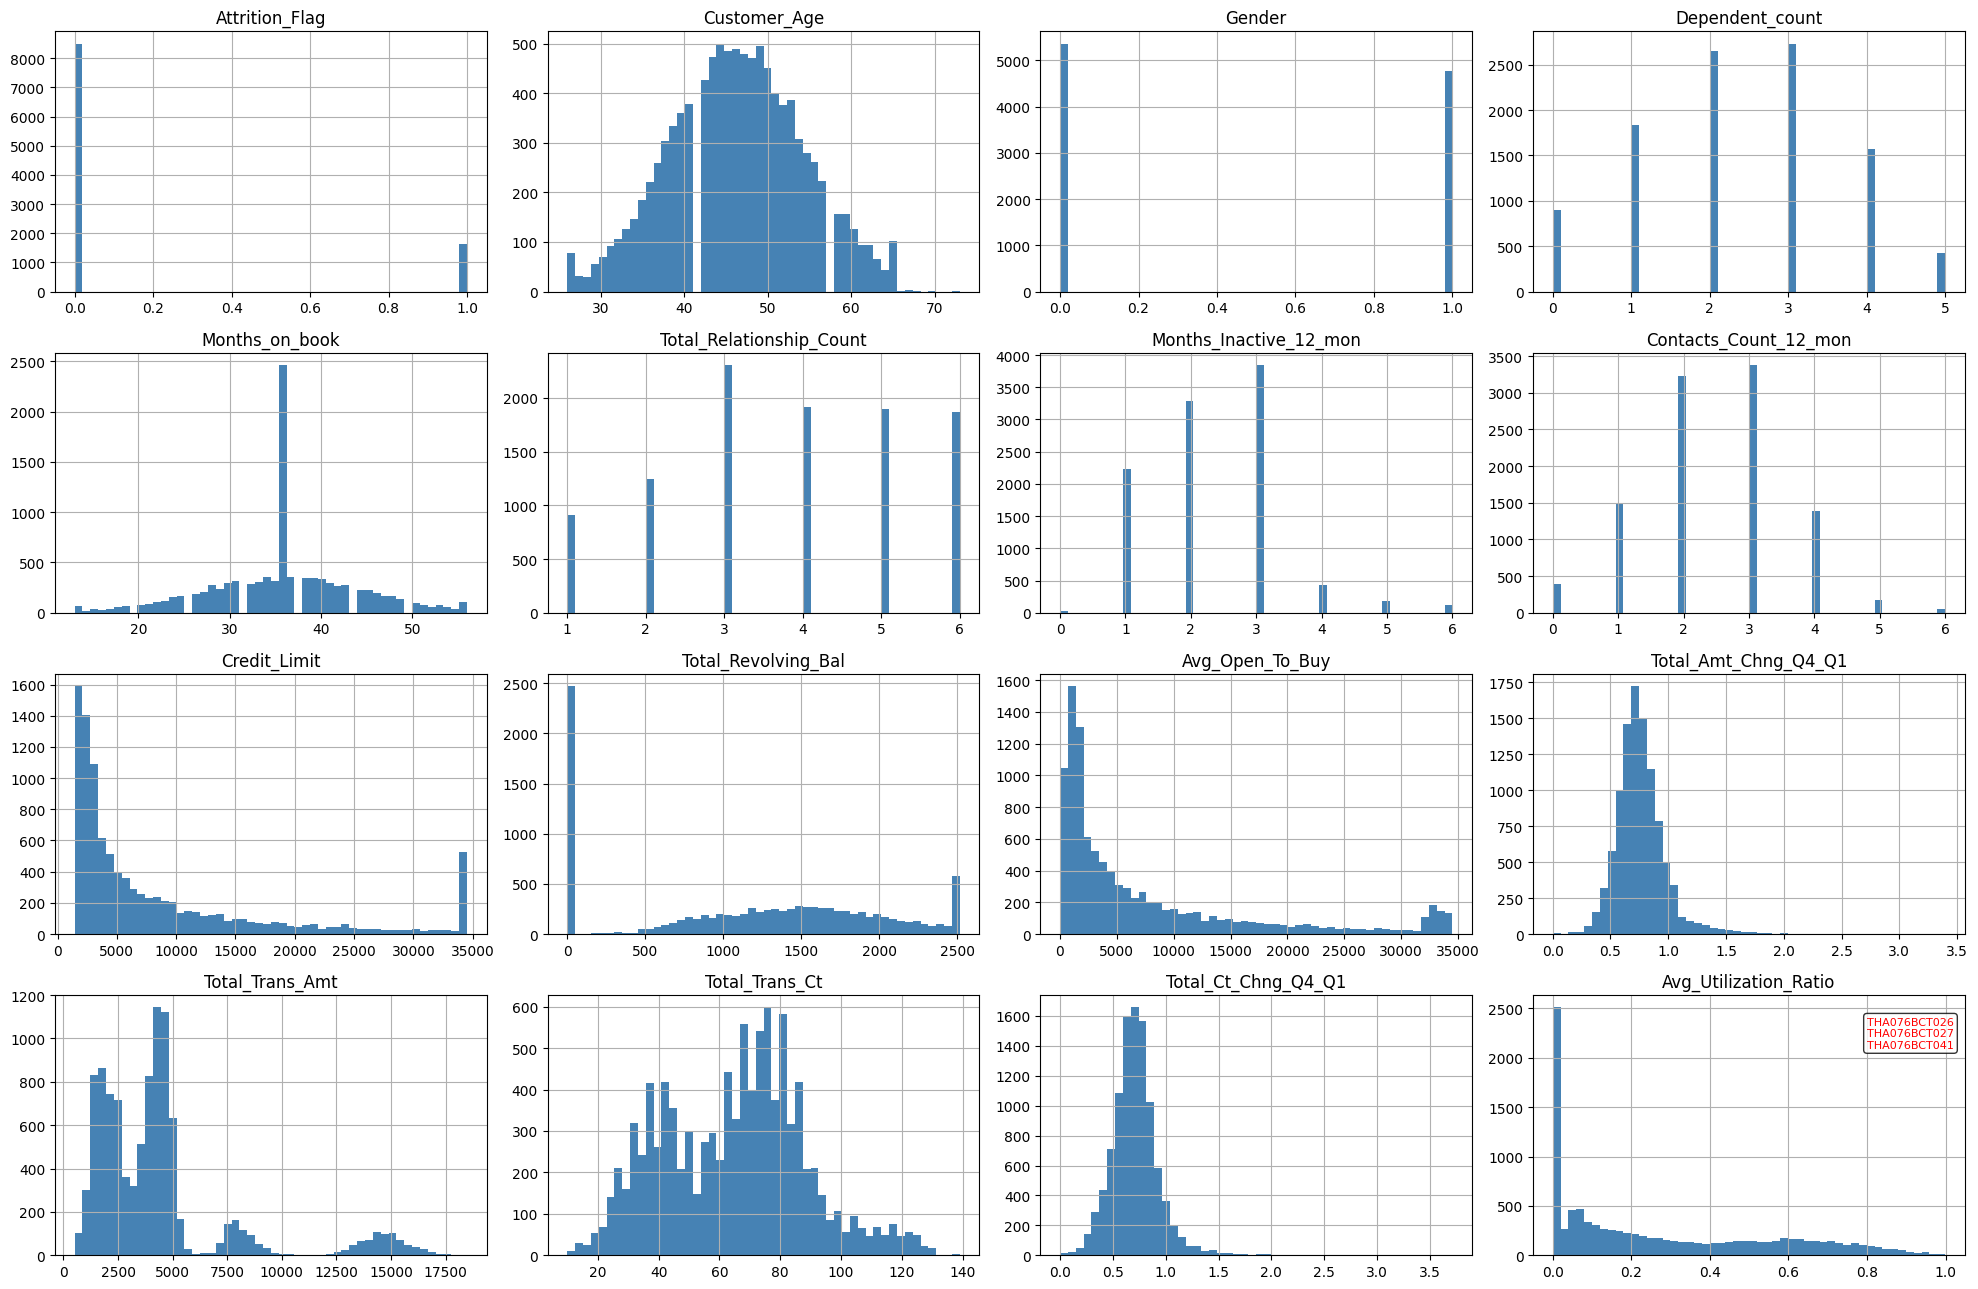

In [27]:
new_df.hist(bins=50, figsize=(20, 13),color='steelblue')
plt.text(0.8, 2100, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
plt.tight_layout()
plt.savefig('Histogram of features.png',bbox_inches='tight')
plt.show()

In [28]:
# features = ['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# ncols=3
# nrows=len(features)//3
# # Create subplots to display histograms of each feature
# fig, axes = plt.subplots(nrows=, ncols=1, figsize=(5, 3 * len(features)), sharex=False)

# # Iterate through each feature and plot its histogram
# for i, feature in enumerate(features):
#     sns.histplot(data=df, x=feature, bins=20, color='steelblue', kde=True, ax=axes[i])
#     axes[i].set_xlabel('Feature Value')
#     axes[i].set_ylabel('Frequency')
#     axes[i].set_title(f'Histogram of {feature}')

# plt.text(400, 450, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
# plt.tight_layout()
# plt.savefig('Histogram of features.png',bbox_inches='tight')
# # Show the plot
# plt.show()







In [29]:
from sklearn.model_selection import train_test_split
X= new_df.drop(columns=['Attrition_Flag'])
Y= new_df['Attrition_Flag']
# X_train, X_test, y_train, y_test will be the resulting datasets

# Split the dataset into training and test sets (80% training and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
X_train.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9066,54,0,1,36,1,3,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464
5814,58,0,4,48,1,4,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334
792,45,0,4,36,6,1,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103
1791,34,0,2,36,4,3,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694
5011,49,0,2,39,5,3,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708


In [31]:
y_train.head()

9066    0
5814    1
792     0
1791    0
5011    0
Name: Attrition_Flag, dtype: int64

In [32]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Gaussian Naive Bayes model
gnb = GaussianNB()

In [33]:
from sklearn.impute import SimpleImputer

# Create an imputer object with strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on X_train
X_train = imputer.fit_transform(X_train)

# Transform X_test using the same imputer
X_test = imputer.transform(X_test)

In [34]:
# Train the Gaussian Naive Bayes model
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

In [35]:
print(y_pred[:10].tolist())
print(y_test[:10].tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [36]:
probs = gnb.predict_proba(X_test)

print(probs[:10])

[[0.83761713 0.16238287]
 [0.97942342 0.02057658]
 [0.94654649 0.05345351]
 [0.98673575 0.01326425]
 [0.61873877 0.38126123]
 [0.85891493 0.14108507]
 [0.97229527 0.02770473]
 [0.67138577 0.32861423]
 [0.97080525 0.02919475]
 [0.1819806  0.8180194 ]]


In [37]:
from sklearn.metrics import confusion_matrix

# Assuming gnb is your trained Gaussian Naive Bayes model and X_test, y_test are your test set and corresponding labels
y_pred = gnb.predict(X_test)

confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

[[1602   97]
 [ 137  190]]


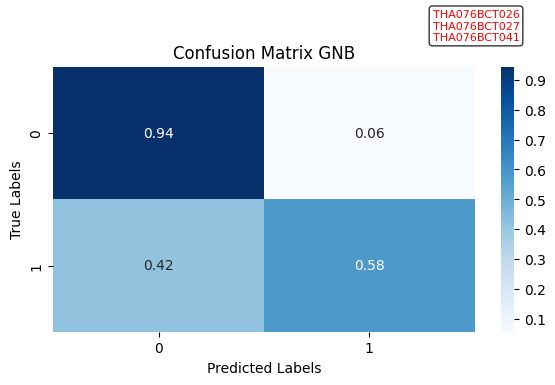

In [38]:
import numpy as np
# Normalize the confusion matrix
normalized_confusion_mat = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_confusion_mat, annot=True, fmt=".2f", cmap="Blues")

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix GNB")

plt.text(1.8, -0.2, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
plt.tight_layout()
plt.savefig('Confusion Matrix GNB.png',bbox_inches='tight')
plt.show()

In [39]:
from sklearn.metrics import classification_report

report=classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1699
           1       0.66      0.58      0.62       327

    accuracy                           0.88      2026
   macro avg       0.79      0.76      0.78      2026
weighted avg       0.88      0.88      0.88      2026



In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8845014807502468


In [41]:
numeric_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group
0,0,45,1,3,High School,Married,$60K - $80K,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,30-49
1,0,49,0,5,Graduate,Single,Less than $40K,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,30-49
2,0,51,1,3,Graduate,Married,$80K - $120K,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,50+
3,0,40,0,4,High School,Unknown,Less than $40K,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,30-49
4,0,40,1,3,Uneducated,Married,$60K - $80K,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,30-49


In [42]:
numeric_df.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,0.470919,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,0.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,1.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [43]:
# Binning settings
age_bins = [0, 11, 21, 31, 41, 51, 61, 71, 81]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
credit_bins = [0, 1001, 2001, 3001, 6001, 12001, 35001]
credit_labels = ['0-1000', '1001-2000', '2001-3000', '3001-6000', '6001-12000', '12001-35000']

categorical_df = numeric_df.drop(columns=['Customer_Age', 'Credit_Limit'])

# Discretize 'Age' column
categorical_df['Age_Category'] = pd.cut(numeric_df['Customer_Age'], bins=age_bins, labels=age_labels)

# Discretize 'Credit_Limit' column
categorical_df['Credit_Category'] = pd.cut(numeric_df['Credit_Limit'], bins=credit_bins, labels=credit_labels)
categorical_df.drop(columns=['Age_Group'],inplace=True)

categorical_df.head()


,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Category,Credit_Category
0,0,1,3,High School,Married,$60K - $80K,39,5,1,3,777,11914.0,1.335,1144,42,1.625,0.061,41-50,12001-35000
1,0,0,5,Graduate,Single,Less than $40K,44,6,1,2,864,7392.0,1.541,1291,33,3.714,0.105,41-50,6001-12000
2,0,1,3,Graduate,Married,$80K - $120K,36,4,1,0,0,3418.0,2.594,1887,20,2.333,0.000,41-50,3001-6000
3,0,0,4,High School,Unknown,Less than $40K,34,3,4,1,2517,796.0,1.405,1171,20,2.333,0.760,31-40,3001-6000
4,0,1,3,Uneducated,Married,$60K - $80K,21,5,1,0,0,4716.0,2.175,816,28,2.500,0.000,31-40,3001-6000


In [77]:
categorical_df=new_df.copy()
# Discretize 'Age' column using equal width method with 5 bins
categorical_df['Age_EqualWidth'] = pd.cut(new_df['Customer_Age'], bins=5,labels=False)

# Discretize 'Fare' column using equal width method with 5 bins
categorical_df['Credit_EqualWidth'] = pd.cut(new_df['Credit_Limit'], bins=5,labels=False)
# categorical_df.drop(columns=['Age_Group'],inplace=True)

categorical_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_EqualWidth,Credit_EqualWidth
0,0,45,1,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,2,1
1,0,49,0,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,2,1
2,0,51,1,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,2,0
3,0,40,0,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0
4,0,40,1,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,0


In [82]:
from sklearn.naive_bayes import CategoricalNB
# Initialize the Categorical Naive Bayes model
cnb = CategoricalNB()
# Access the attributes of the classifier using the get_params() method
classifier_attributes = cnb.get_params()

# Display the attributes
print(classifier_attributes)
# Drop the rows containing 'UNKNOWN' in any column
# categorical_df =categorical_df = categorical_df.drop(index=categorical_df[categorical_df.eq('UNKNOWN').any(axis=1)].index)
X1= categorical_df.drop(columns=['Attrition_Flag'])
Y1= categorical_df['Attrition_Flag']

# Split the dataset into training and test sets (80% training and 20% test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=42)
print(X_train1.head())
print(X_test1.head())

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'min_categories': None}
      Customer_Age  Gender  Dependent_count  Months_on_book  \
9066            54       0                1              36   
5814            58       0                4              48   
792             45       0                4              36   
1791            34       0                2              36   
5011            49       0                2              39   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
9066                         1                       3                      3   
5814                         1                       4                      3   
792                          6                       1                      3   
1791                         4                       3                      4   
5011                         5                       3                      4   

      Credit_Limit  Total_Revolv

In [79]:
X_train1.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Age_EqualWidth              0
Credit_EqualWidth           0
dtype: int64

In [84]:
# Create an imputer object with strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on X_train
# X_train1 = imputer.fit_transform(X_train1)
print(type(X_test1))
# Transform X_test using the same imputer
# X_test1 = imputer.transform(X_test1)
print(type(X_test1))
# Train the model on the training data
print(X_train1.shape,X_test1.shape)
classifier_attributes = cnb.get_params()

# Display the attributes
print(classifier_attributes)
# Make predictions on the test data
# Train the model on the training data
cnb.fit(X_train1, y_train1)
length=len(X_test1)
print(length)
# Make predictions on the test data
y_pred1 = cnb.predict(X_test1.values)

print(y_pred1)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(8101, 17) (2026, 17)
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'min_categories': None}
2026


E:\Major Project\Continual-Monument-Detection\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


IndexError: index 73 is out of bounds for axis 1 with size 71

In [ ]:
confusion_mat = confusion_matrix(y_test1, y_pred1)

print(confusion_mat)

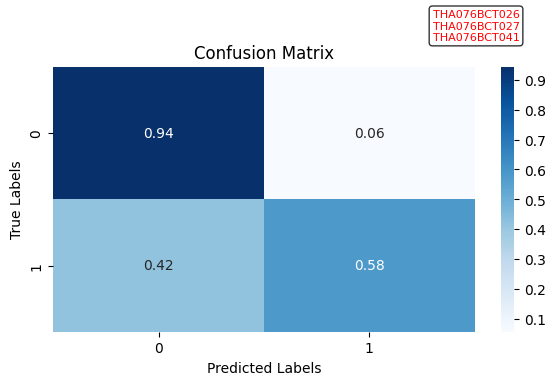

In [48]:
# Normalize the confusion matrix
normalized_confusion_mat = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_confusion_mat, annot=True, fmt=".2f", cmap="Blues")

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.text(1.8, -0.2, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
plt.tight_layout()
plt.savefig('Confusion Matrix CNB_eql_width.png',bbox_inches='tight')

plt.show()

In [ ]:
report=classification_report(y_test1, y_pred1)

# Print the classification report
print(report)

In [ ]:
categorical_df1=numeric_df.drop(columns=['Age','Fare'])
categorical_df1['Fare_EqualFrequency'] = pd.qcut(numeric_df['Fare'], q=5, labels=False)

# Discretize 'Age' column using equal frequency method with 5 bins
categorical_df1['Age_EqualFrequency'] = pd.qcut(numeric_df['Age'], q=5, labels=False)
categorical_df1.head()


In [ ]:
X2= categorical_df1.drop(columns=['Survived'])
Y2= categorical_df1['Survived']
# Split the dataset into training and test sets (80% training and 20% test)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [ ]:
# Fit and transform the imputer on X_train
X_train2 = imputer.fit_transform(X_train2)

# Transform X_test using the same imputer
X_test2 = imputer.transform(X_test2)
# Train the model on the training data
cnb.fit(X_train2, y_train2)

# Make predictions on the test data
y_pred2 = cnb.predict(X_test2)

In [ ]:
confusion_mat = confusion_matrix(y_test2, y_pred2)
print(confusion_mat)

In [ ]:
# Normalize the confusion matrix
normalized_confusion_mat = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_confusion_mat, annot=True, fmt=".2f", cmap="Blues")

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.text(1.8, -0.2, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
plt.tight_layout()
plt.savefig('Confusion Matrix GNB_eql_freq.png',bbox_inches='tight')

plt.show()

In [ ]:
report=classification_report(y_test2, y_pred2)

# Print the classification report
print(report)